# Clustering Algorithms

Both projection and manifold techniques reduce dimensionality by bringing down the num of columns.

Another class of algos - clustering algos - bring down the number of rows or cases in a dataset. 

Recall Kmeans from MKTR? The approach was to *partition* the dataset into 'similar' cases in terms of their feature values. 

In what follows, we look intuition for k-means clustering, followed by an application and some other clustering algos out there.

In [1]:
# setup chunk
#! pip install mglearn

import mglearn

C:\Users\20052\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\20052\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## How does k-means work?

Kmeans finds a pre-specified K *cluster centers* representative of certain data regions. 

It starts by making a random, initial assignment of K cluster centers. 

The algo then essentially alternates between the following two steps:<p>

- One, it assigns each data point to the closest cluster center. <p>

- Two, it resets each cluster center to the mean of all units assigned to it.<p>

The algo finishes when no further change in cluster assignment happens.

A good way to literally *see* this play out is from an mglearn func, as below. 
    
Behold.

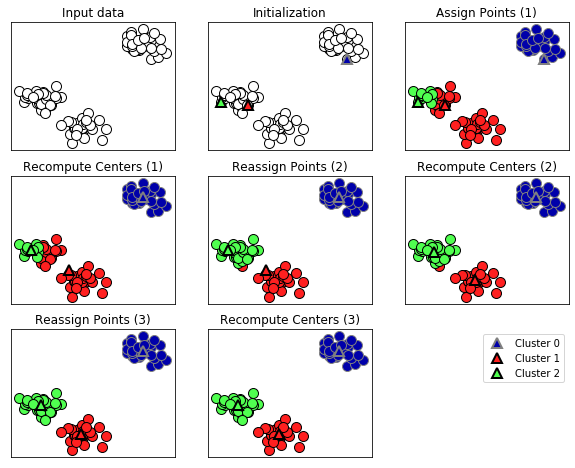

In [2]:
# visualize k-means intuition
mglearn.plots.plot_kmeans_algorithm()

Above we specified k=3. Cluster memberships are color coded and triangles indicate cluster centers.

Note how steps (1), (2) and (3) have the above alternating sequence and how the stopping rule is met at step 3.

Next we see how the cluster boundaries happen given k cluster centers

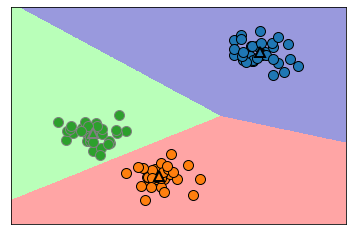

In [3]:
mglearn.plots.plot_kmeans_boundaries()

The above is akin to a *Voroloi diagram* (yup, not going there). The cluster regions color coded indicate that if a test data point is anywhere in that region, its assignment is clear.

Time now to do some applications with k-means. We've seen in MKTR some k-means applications in classical MKTG segmentation.

Now, let's go beyond and work with unstructured data. See below.

## Image Segmentation Apps with Kmeans

Idea here is to cluster image pixels together that have similar RGB intensities.

Next logical step then would be to replace all pixels in a cluster with the RGB intensities of its cluster center.

A cartoon-ish image is formed with low resolution. Behold.

image size n shape:  (100, 100, 3)


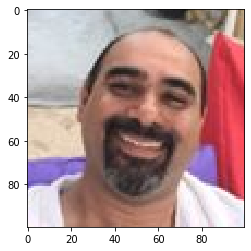

In [5]:
## image segmentation using k-means
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.image import imread

# reading my profile image from github directly into Py
image_sv = imread("https://avatars0.githubusercontent.com/u/17176159?s=460&v=4")
print("image size n shape: ", image_sv.shape)   # 100x100x3
plt.imshow(image_sv)

Recall that we find inter-row distances based on feature values. 

So here, we need to find groups of pixels similar to one another in their RGB (Red Green Blue) intensities.

IOW, we have to *reshape* the 100x100x3 pixel 3d array into a 2-D array with 3 feature columns. See below.

In [6]:
# reshape and segment img
X = image_sv.reshape(-1, 3)   # drop one Dimn
print("reshaped array has shape: ", X.shape)   # 10000x3

# run kmeans with say, k=8 clusters
from sklearn.cluster import KMeans  # import Kmeans
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)  # instantiate & fit

# view clus centers
print(kmeans.cluster_centers_)  # sized 8x3
print("\n")
print(kmeans.labels_[:10])  # cluster assignment vector
print("==========\n")

segmented_img = kmeans.cluster_centers_[kmeans.labels_]
print("segmented array shape: ", segmented_img.shape)  # 10000x3
segmented_img = segmented_img.reshape(image_sv.shape)
print("reshaped segmented array shape: ", segmented_img.shape)  # 100x100x3

reshaped array has shape:  (10000, 3)
[[0.26724544 0.19580412 0.1836819 ]
 [0.77277386 0.6526105  0.6111224 ]
 [0.6523799  0.49719864 0.4474463 ]
 [0.84575164 0.7999034  0.77269983]
 [0.83366954 0.24966651 0.3058491 ]
 [0.9018556  0.89788604 0.9244715 ]
 [0.5006349  0.35693768 0.32513905]
 [0.5551954  0.44664648 0.7829858 ]]


[3 3 3 3 3 5 5 5 5 5]

segmented array shape:  (10000, 3)
reshaped segmented array shape:  (100, 100, 3)


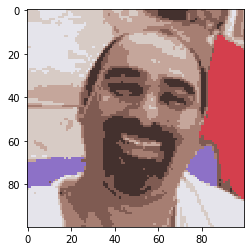

In [7]:
# view segmented img
plt.imshow(segmented_img)

## Resolution with Varying k

Below I loop what we did above for different K in k-means and see the results. 

See below.

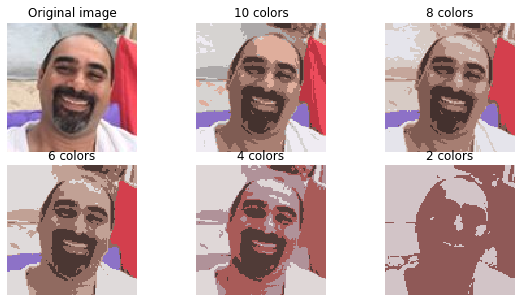

2.28  secs


In [10]:
import time
t1 = time.time()

# img segmtn with varying k
segmented_imgs = []   # emptyt list to populate
n_colors = (10, 8, 6, 4, 2)   # varying k in kmeans

# for loop over varying k
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image_sv.shape))

# plot stuff
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image_sv)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

#save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()

t2 = time.time()    
print(round(t2-t1, 2), " secs")

The point of the above?

We are changing data representation by reducing size and shape ==> making data smaller means that learners can train faster.

The original image is one we as humans are good at just looking at and recognizing. Machines may however learn better with other representations of the same data that may not make much sense to us humans. 

Above, the segmented image is giving us a chance to convert image representation into something that hopefully machines can train better on.

Image segmentation has found varied applications in object boundary detection and various downstream applications

A number of other clustering algos exist - DBSCAN for one - even though k-means is the most popular. 

Some limitations should be noted.

- kmean uses random initialization of cluster centers, implying we could well get 2+ different k-means solutions for the same k and the same data.
- Model evaluation in general is hard with unsupervised algos. Several metrics are floating around, will not go there.
- Scaling and standardization is necessary

Time now to head to the lfw dataset wherein we can compare and contrast PCA and kmeans.

Voleti